In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Input
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras
keras.backend.set_image_dim_ordering("th")

import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [ ]:
input_tensor = Input(shape=(3,240,320))
#model = VGG16(weights='imagenet', input_tensor=input_tensor, include_top=False)
model = VGG16(weights='imagenet')

In [4]:
def load_datasets():
    DATASET_FILE = '/root/sharedfolder/salnet2/data/dataset.h5'
    f = h5py.File(DATASET_FILE)
    X_train = f['train/stimuli']
    Y_train = f['train/saliency']
    X_val = f['val/stimuli']
    Y_val = f['val/saliency']
    print X_train.shape, Y_train.shape
    print X_val.shape, Y_val.shape
    return (X_train, Y_train), (X_val, Y_val)

In [33]:
(X_train, Y_train), (X_val, Y_val) = load_datasets()

(9000, 3, 240, 320) (9000, 1, 240, 320)
(1000, 3, 240, 320) (1000, 1, 240, 320)


(240, 320, 3)


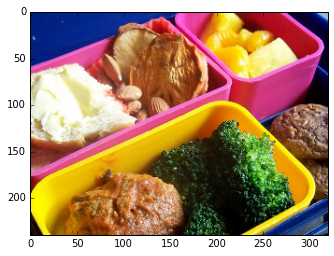

In [39]:
img1 = cv2.resize(X_train[0].transpose((1,2,0)).astype(np.uint8), (320, 240), interpolation=cv2.INTER_CUBIC)
print img1.shape
plt.imshow(img1)

In [40]:
x = image.img_to_array(img1)
x = np.expand_dims(x, axis=0)
img1_pro = preprocess_input(x)

In [59]:
def process_image(img, size=(224, 224)):
    img = cv2.resize(img.transpose((1,2,0)).astype(np.uint8), size, interpolation=cv2.INTER_CUBIC)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img) 
    return img

img1_pro = process_image(X_train[0], size=(320,240))

In [60]:
img1_pro.shape

(1, 3, 240, 320)

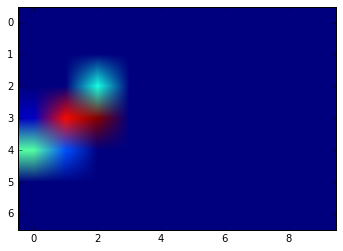

In [67]:
preds = model.predict(img1_pro)
#print('Predicted:', decode_predictions(preds, top=3)[0])
preds.shape

# Prepare dataset

In [75]:
# Loop to process 

X_train.shape

def process_images(images, size=(244,244)):

    def process_image(img, size):
        img = cv2.resize(img.transpose((1,2,0)).astype(np.uint8), size, interpolation=cv2.INTER_CUBIC)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img) 
        return img
    
    # Output array
    out_images = np.zeros((images.shape[0], images.shape[1], size[1], size[0]))
    
    # For each image
    for i in range(images.shape[0]):
        #Process
        out_images[i] = process_image(images[i], size)
        
    return out_images

In [94]:
X_train_processed = process_images(X_train, size=(320, 240))

In [96]:
X_val_processed = process_images(X_val, size=(320, 240))

In [98]:
import h5py
print('Saving file')

f = h5py.File("/root/sharedfolder/salnet_keras/input/dataset_for_vgg16keras.h5", "w")
f.create_dataset("train/stimuli", data=X_train_processed)
f.create_dataset("train/saliency", data=Y_train)
f.create_dataset("val/stimuli", data=X_val_processed)
f.create_dataset("val/saliency", data=Y_val)
f.close()

Saving file


# Test the dataset

In [115]:
def load_datasets():
    DATASET_FILE = '/root/sharedfolder/salnet_keras/input/dataset_for_vgg16keras.h5'
    f = h5py.File(DATASET_FILE)
    X_train = f['train/stimuli']
    Y_train = f['train/saliency']
    X_val = f['val/stimuli']
    Y_val = f['val/saliency']
    print X_train.shape, Y_train.shape
    print X_val.shape, Y_val.shape
    return (X_train, Y_train), (X_val, Y_val)

In [100]:
(X_train, Y_train), (X_val, Y_val) = load_datasets()

(9000, 3, 240, 320) (9000, 1, 240, 320)
(1000, 3, 240, 320) (1000, 1, 240, 320)


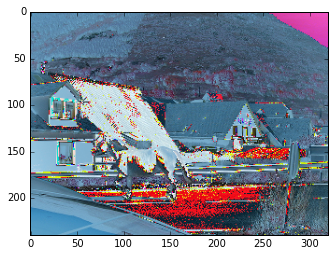

In [104]:
plt.imshow(X_val[1].transpose((1,2,0)))

Adding all the salienvy map: 17360
Max: 1
Min: 0


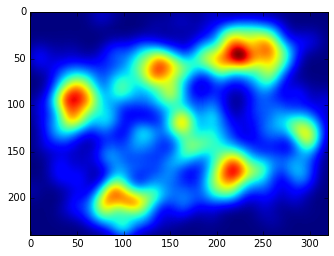

In [112]:
sal_map = Y_train[0, 0, :, :]
plt.imshow(sal_map)
print 'Adding all the salienvy map: %d' % np.sum(sal_map)
print 'Max: %d' % np.max(sal_map)
print 'Min: %d' % np.min(sal_map)

# Test the model

In [2]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Input
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras
keras.backend.set_image_dim_ordering("th")

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [8]:
(X_train, Y_train), (X_val, Y_val) = load_datasets()

(9000, 3, 240, 320) (9000, 1, 240, 320)
(1000, 3, 240, 320) (1000, 1, 240, 320)


In [9]:
input_tensor = Input(shape=(3,240,320))
base_model = VGG16(weights='imagenet', input_tensor=input_tensor, include_top=False)

In [10]:
x = base_model.get_layer('block2_pool').output

1.0

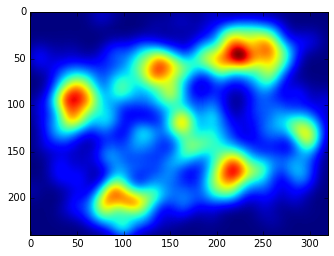

In [14]:
Y_train.shape
plt.imshow(Y_train[0,0,:,:])
pred = Y_train[0,0,:,:]
np.max(pred)


In [3]:
(X_train, Y_train), (X_val, Y_val) = load_datasets()

NameError: name 'load_datasets' is not defined

# Model vgg keras normalized

In [1]:
import sys
sys.path.append('/root/sharedfolder/salnet_keras/')
import model1_salnet_keras as salnet
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5110)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


<module 'model1_salnet_keras' from '/root/sharedfolder/salnet_keras/model1_salnet_keras.pyc'>

In [2]:
model = salnet.get_model()

In [31]:
w = model.get_layer('block2_conv1').get_weights()
print w[1]
w[1] = w[1] * (1.0/150)
print w[1]

model.get_layer('block2_conv1').set_weights(w)
w = model.get_layer('block2_conv1').get_weights()
print w[1]


[ -6.02833376e-13   8.48168757e-13  -4.13085283e-13   1.14459321e-12
   1.68363088e-12   3.24173132e-12   2.16085093e-12   3.15777829e-12
   2.91882794e-12   1.87604272e-12   4.36303175e-13   1.96945823e-12
   1.52104227e-13  -2.43832495e-15   3.55744102e-12   3.22120477e-12
   3.60174564e-12   3.57425873e-12   3.55702208e-12   3.55923819e-12
   2.91873340e-12   2.49598801e-12   5.24024251e-14   8.10121989e-13
   4.81283026e-12   2.86807123e-12   1.84467155e-12   2.98822029e-13
  -1.93767284e-13   8.64150819e-13   4.13579978e-12  -1.01465049e-12
   1.37776943e-12   2.76454987e-12  -9.75806567e-13  -1.13093280e-12
   1.79782968e-12   3.11624446e-12   3.96446439e-13  -4.84820348e-14
   1.00860726e-13   4.03810449e-12   1.71496584e-12   5.47911258e-14
   3.56290518e-12   3.31950765e-12   3.80638056e-12   1.67641346e-12
   3.69730375e-12  -5.89492268e-13  -5.57790739e-13   8.23834436e-13
   1.31932995e-12  -1.31191509e-12   1.34007508e-12   3.12089482e-12
   1.03272425e-12   1.68980997e-12

In [25]:
len(model.get_layer('input_1').get_weights())

0

In [28]:
for layer in model.layers[:12]:
    print layer.name
    w = layer.get_weights()
    print len(w)
    if len(w) > 0 : # Is convolutional
        w[1] = w[1] * (1.0/150)
        layer.set_weights(w)

input_1
0
block1_conv1
2
block1_conv2
2
block1_pool
0
block2_conv1
2
block2_conv2
2
block2_pool
0
block3_conv1
2
block3_conv2
2
block3_conv3
2
conv4
2
conv5
2
